Automatically created module for IPython interactive environment
Sparsity with L1 penalty: 15.69%
Test score with L1 penalty: 0.8704
Example run in 14.974 s


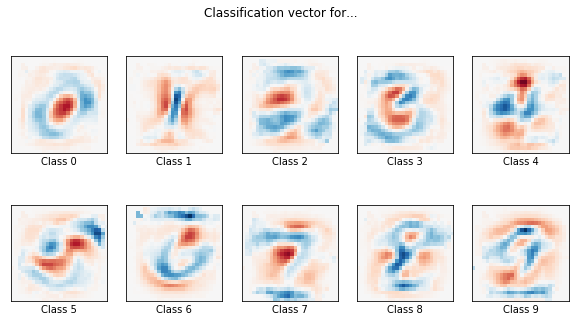

In [6]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

In [5]:
clf.coef_=0

In [17]:
y_train.shape

(5000,)

In [28]:
X_train.shape

(5000, 784)

In [23]:
np.array([1,2,3],[4,5,6,7,8])

TypeError: data type not understood

In [33]:
a2 = np.array([[0,2,3,4,0],[6,7,8,9,10]])

In [34]:
a2

array([[ 0,  2,  3,  4,  0],
       [ 6,  7,  8,  9, 10]])

In [26]:
a2.shape

(2, 5)

In [27]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
np.mean(a2==0)

0.2

In [37]:
coef.shape

(10, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_train

array(['3', '4', '4', ..., '8', '9', '4'], dtype=object)

In [46]:
import pandas as pd

df=pd.DataFrame({'math':[98,78,54,89,24,60,98,44,96,90],'english':[92,56,90,57,46,75,76,87,91,88],'is_good':[1,0,0,0,0,0,1,0,1,1]})

In [47]:
from sklearn.linear_model import LogisticRegression

/Users/para/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [49]:
X=df.ix[:,['math','english']]

y=df['is_good']
clf_lg=LogisticRegression()

clf_lg.fit(X, y)
clf_lg.coef_

/Users/para/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/para/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([[-0.03554855,  0.01908979],
       [ 0.03806805, -0.03066133],
       [-0.00961327, -0.00970065]])

In [51]:
clf_lg.coef_.shape

(3, 2)

In [62]:
clf_lg.coef_.T * X

ValueError: Unable to coerce to DataFrame, shape must be (10, 2): given (2, 3)

In [67]:
np.array(X)

ValueError: operands could not be broadcast together with shapes (10,2) (3,2) 

In [69]:
np.dot(X,clf_lg.coef_.T)

array([[-1.72749766,  0.90982669, -1.83456011],
       [-1.70375895,  1.25227346, -1.29307131],
       [-0.20154096, -0.70384472, -1.39217506],
       [-2.07570323,  1.64036065, -1.4085179 ],
       [ 0.02496496, -0.49678783, -0.67694838],
       [-0.70117908, -0.01551656, -1.30434489],
       [-2.03293425,  1.40040789, -1.67934968],
       [ 0.09667519, -0.99254122, -1.26694044],
       [-1.67549034,  0.86435192, -1.80563292],
       [-1.51946839,  0.72792762, -1.71885137]])

In [71]:
y

0    1
1    0
2    0
3    2
4    0
5    0
6    1
7    2
8    1
9    1
Name: is_good, dtype: int64

/Users/para/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/para/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.03806805, -0.03066133]])

In [74]:
np.dot(X,clf_lg.coef_.T)

array([[ 0.90982669],
       [ 1.25227346],
       [-0.70384472],
       [ 1.64036065],
       [-0.49678783],
       [-0.01551656],
       [ 1.40040789],
       [-0.99254122],
       [ 0.86435192],
       [ 0.72792762]])

In [92]:
print(X)
print(y)

   math  english
0    98       92
1    78       56
2    54       90
3    89       57
4    24       46
5    60       75
6    98       76
7    44       87
8    96       91
9    90       88
0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: is_good, dtype: int64


[0.01227631 0.01001799] 0.6411437032007707


/Users/para/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


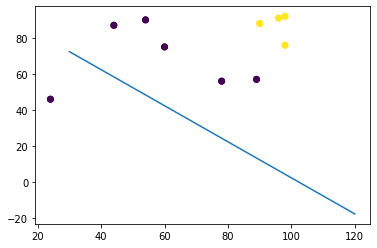

In [109]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df=pd.DataFrame({'math':[98,78,54,89,24,60,98,44,96,90,],'english':[92,56,90,57,46,75,76,87,91,88],'is_good':[1,0,0,0,0,0,1,0,1,1]})
X=df.ix[:,['math','english']]
df.to_csv('test1.csv')
y=df['is_good']
clf_lg=LinearRegression()

clf_lg.fit(X, y)

score = clf_lg.score(X, y)
print(clf_lg.coef_,score)

import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
x_plot = np.array([[30],[120]])
y_plot = (-clf_lg.intercept_ - x_plot* clf_lg.coef_[0])/clf_lg.coef_[0]
plt.plot(x_plot,y_plot)

In [79]:
X

,math,english
0,98,92
1,78,56
2,54,90
3,89,57
4,24,46
5,60,75
6,98,76
7,44,87
8,96,91
9,90,88


In [83]:
np.dot(X,clf_lg.coef_.T)

array([[ 0.90982669],
       [ 1.25227346],
       [-0.70384472],
       [ 1.64036065],
       [-0.49678783],
       [-0.01551656],
       [ 1.40040789],
       [-0.99254122],
       [ 0.86435192],
       [ 0.72792762]])

In [81]:
print(2)

2


In [82]:
a=2

In [85]:
clf_lg.predict(X)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [86]:
y

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: is_good, dtype: int64

In [87]:
score = clf_lg.score(X, y)

In [88]:
score

0.8

In [89]:
clf_lg.coef_

array([[ 0.03806805, -0.03066133]])